In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn import linear_model

from sklearn import metrics

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(149087, 21)

In [4]:
train.sample(5)

,Sno,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
53010,189438,Fiscal,2016,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",9100,...,9117,Pr Fare Collections Receiver,26300,0.00,0.00,9310.13,8473.86,4056.88,21840.87,2
98777,78195,Fiscal,2014,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,...,2450,Pharmacist,45556,101.91,941.12,30063.72,12504.74,9051.38,51619.84,3
140798,76076,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,...,1404,Clerk,10673,1854.00,968.64,13979.23,12501.45,4662.82,31143.50,2
79035,87086,Fiscal,2014,2,"Public Works, Transportation & Commerce",AIR,AIR Airport Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5500,...,5504,Project Manager 2,552,0.00,0.00,31131.09,12516.72,9610.54,53258.35,3
119620,97923,Fiscal,2015,2,"Public Works, Transportation & Commerce",WTR,WTR Water Enterprise,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,...,5241,Engineer,7008,0.00,0.00,28854.26,12270.95,9973.30,51098.51,3


In [5]:
# Drop individual salaray components.
train.drop(['Retirement', 'Health/Dental', 'Other Benefits'], axis = 1, inplace=True)

In [6]:
# Drop Redundant Information
train.drop(['Organization Group', 'Department', 'Union', 'Job Family', 'Job', 'Employee Identifier'], axis = 1, inplace=True)

In [7]:
train.drop(['Sno'], axis = 1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 11 columns):
Year Type                  149087 non-null object
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Department Code            149087 non-null object
Union Code                 149087 non-null int64
Job Family Code            149087 non-null object
Job Code                   149087 non-null object
Overtime                   149087 non-null float64
Other Salaries             149087 non-null float64
Total Benefits             149087 non-null float64
Class                      149087 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 12.5+ MB


In [9]:
# drop Year Type as it contains a single value.
train.drop(['Year Type'], axis = 1, inplace=True)

In [10]:
# Map Department Code to Numerical Values
dc_le = preprocessing.LabelEncoder()
dc_le.fit(train['Department Code'])
train['Department Code'] = dc_le.transform(train['Department Code'])

# Map Job Family Code to Numerical Values
jfc_le = preprocessing.LabelEncoder()
jfc_le.fit(train['Job Family Code'])
train['Job Family Code'] = jfc_le.transform(train['Job Family Code'])

# Map Job Code to Numerical Values
jc_le = preprocessing.LabelEncoder()
jc_le.fit(train['Job Code'])
train['Job Code'] = jc_le.transform(train['Job Code'])

In [11]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

LOWER = Q1 - 1.5 * IQR
UPPER = Q3 + 1.5 * IQR


train=train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

train = train[(train['Total Benefits'] > LOWER['Total Benefits']) & (train['Total Benefits'] < UPPER['Total Benefits'])]
train = train[(train['Overtime'] > LOWER['Overtime']) & (train['Overtime'] < UPPER['Overtime'])]
train = train[(train['Other Salaries'] > LOWER['Other Salaries']) & (train['Other Salaries'] < UPPER['Other Salaries'])]

train = train[(train['Total Benefits'] > 0)]
train = train[(train['Overtime'] > 0)]
train = train[(train['Other Salaries'] > 0)]

In [12]:
train.shape

(28577, 10)

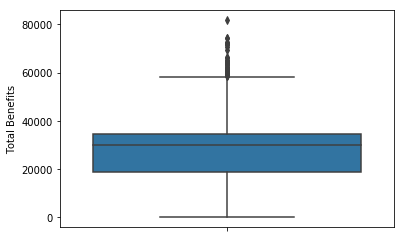

In [13]:
sns.boxplot(train['Total Benefits'],orient = 'v')

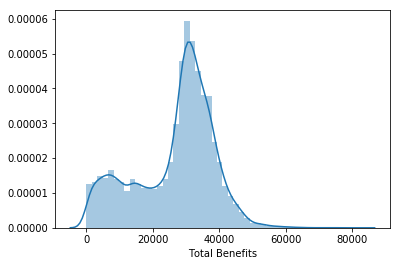

In [14]:
sns.distplot(train['Total Benefits'])

In [15]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,28577.0,2015.070931,1.417047,2013.00,2014.00,2015.00,2016.00,2017.00
Organization Group Code,28577.0,2.740071,1.470754,1.00,2.00,2.00,4.00,7.00
Department Code,28577.0,29.395773,13.166189,0.00,20.00,34.00,41.00,55.00
Union Code,28577.0,496.310250,307.725307,1.00,250.00,498.00,790.00,969.00
Job Family Code,28577.0,32.275396,16.987719,0.00,15.00,38.00,47.00,61.00
Job Code,28577.0,687.078280,344.412768,0.00,349.00,771.00,994.00,1140.00
Overtime,28577.0,2290.301360,2040.133462,0.30,499.96,1667.57,3758.18,7178.58
Other Salaries,28577.0,3086.212255,2964.660347,0.69,735.91,1952.30,4740.91,11391.90
Total Benefits,28577.0,26731.156869,11865.945544,1.91,18803.48,29843.85,34689.26,81882.28
Class,28577.0,1.978339,0.692798,1.00,1.00,2.00,2.00,3.00


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28577 entries, 4 to 149086
Data columns (total 10 columns):
Year                       28577 non-null int64
Organization Group Code    28577 non-null int64
Department Code            28577 non-null int32
Union Code                 28577 non-null int64
Job Family Code            28577 non-null int32
Job Code                   28577 non-null int32
Overtime                   28577 non-null float64
Other Salaries             28577 non-null float64
Total Benefits             28577 non-null float64
Class                      28577 non-null int64
dtypes: float64(3), int32(3), int64(4)
memory usage: 2.1 MB


In [17]:
X = train.drop('Class', axis=1)
y = train.pop('Class')

In [18]:
accuracy = []
labels = []

In [19]:
rfc_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
accuracy_scores = cross_val_score(rfc_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('RandomForrest')

[0.90870934 0.91640434 0.91605456 0.91710388 0.91392582 0.9100455
 0.91879594 0.91179559 0.91176471 0.90616246]
0.9130762148093237


In [20]:
lgr_model = LogisticRegression(multi_class = 'auto', solver = 'lbfgs', random_state=0)
accuracy_scores = cross_val_score(lgr_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('LogisticRegression')

[0.84435117 0.84644981 0.8440014  0.85239594 0.85094472 0.83934197
 0.8540427  0.8480924  0.85504202 0.84348739]
0.8478149523294712


In [21]:
bag_model = BaggingClassifier(n_estimators=50)
accuracy_scores = cross_val_score(bag_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('BaggingClassifier')

[0.95977615 0.96257433 0.96047569 0.95767751 0.96291113 0.95869793
 0.96219811 0.96044802 0.95728291 0.94887955]
0.9590921331464157


In [22]:
gradBoost_model = GradientBoostingClassifier(n_estimators=100)
accuracy_scores = cross_val_score(gradBoost_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('GradientBoostingClassifier')

[0.9475341  0.94928297 0.9475341  0.95208115 0.95381386 0.94819741
 0.95239762 0.95379769 0.94887955 0.94572829]
0.9499246737609139


In [ ]:
svc_model = LinearSVC()
accuracy_scores = cross_val_score(svc_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('SupportVectorClassifier')

[0.55683806 0.72682756 0.76425324 0.78488982 0.75857243 0.71508575
 0.63528176 0.41617081 0.72408964 0.75980392]
0.6841812986972499


In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=100)
accuracy_scores = cross_val_score(adaboost_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('AdaBoostClassifier')

In [ ]:
df = pd.DataFrame()
df['accuracy'] = accuracy
df['classifier'] = labels

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
lm = sns.lmplot('classifier', # Horizontal axis
           'accuracy', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="classifier", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 20}) # S marker size

lm.set_xticklabels(rotation=90)
 
lm.fig.suptitle('Accuracy scores for different Classifier Models', fontsize=14)

In [ ]:
test = pd.read_csv('test.csv')

# Drop individual salaray components.
test.drop(['Retirement', 'Health/Dental', 'Other Benefits'], axis = 1, inplace=True)

# Drop Redundant Information
test.drop(['Organization Group', 'Department', 'Union', 'Job Family', 'Job', 'Employee Identifier'], axis = 1, inplace=True)

# Drop useless Serial Number column
test.drop(['Sno'], axis = 1, inplace=True)

# drop Year Type as it contains a single value.
test.drop(['Year Type'], axis = 1, inplace=True)

# Map Department Code to Numerical Values
test['Department Code'] = dc_le.transform(test['Department Code'])

# Map Job Family Code to Numerical Values
test['Job Family Code'] = jfc_le.transform(test['Job Family Code'])

# Map Job Code to Numerical Values
test['Job Code'] = jc_le.transform(test['Job Code'])

X_test = test.drop('Class', axis=1)

y_test_pred_rf = rf_model.predict(X_test)

y_test_pred_bagC = bag_model.predict(X_test)

In [ ]:
test = test[(test['Total Benefits'] > LOWER['Total Benefits']) & (test['Total Benefits'] < UPPER['Total Benefits'])]
test = test[(test['Overtime'] > LOWER['Overtime']) & (test['Overtime'] < UPPER['Overtime'])]
test = test[(test['Other Salaries'] > LOWER['Other Salaries']) & (test['Other Salaries'] < UPPER['Other Salaries'])]

test = test[(test['Total Benefits'] > 0)]
test = test[(test['Overtime'] > 0)]
test = test[(test['Other Salaries'] > 0)]